In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

In [3]:
df = pd.read_excel("online_retail.xlsx")

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [7]:
df.shape

(525461, 8)

In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [9]:
df.nunique()

Invoice        28816
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

In [10]:
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
Name: Description, dtype: int64

In [11]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925


### İptal Edilen İşlemleri Veri Setinden Silme

In [12]:
## İptal edilen işlemler

df = df[~(df["Invoice"].str.startswith("C", na = False))]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Eksik Değerleri Doldurma

In [13]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [14]:
# Sayısal sütunlardaki eksik değerleri ortalama ile doldurma
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Kategorik sütunlardaki eksik değerleri mod ile doldurma
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### Aykırı Değerleri Yakalama ve Devre Dışı Bırakma

In [16]:
# Aykırı değerleri yakalayıp devre dışı bırakma fonksiyonu

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Her sayısal sütun için aykırı değerleri kaldırma
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

In [17]:
df.describe()

,Quantity,Price,Customer ID
count,425957.000000,425957.000000,425957.000000
mean,4.830077,2.854835,15409.055499
std,4.445147,2.048186,1482.451226
min,-12.000000,0.000000,12346.000000
25%,1.000000,1.250000,14479.000000
50%,3.000000,2.100000,15368.504107
75%,7.000000,3.750000,16520.000000
max,23.000000,8.700000,18287.000000


In [18]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom


### Stok Kodu İçin Yapılan Düzeltme İşlemeri

In [19]:
# Her stok kodu bir ürünü temsil ettiğinden bu 2 değişkenin (Açıklama & Stok Kodu) benzersiz değerleri eşit olmalıdır.

df_product = df[["Description","StockCode"]].drop_duplicates()
df_product = df_product.groupby(["Description"]).agg({"StockCode":"count"}).reset_index()


df_product.rename(columns={'StockCode':'StockCode_Count'},inplace=True)
df_product.head()

,Description,StockCode_Count
0,22467,1
1,22719,1
2,DOORMAT UNION JACK GUNS AND ROSES,1
3,3 STRIPEY MICE FELTCRAFT,1
4,4 PURPLE FLOCK DINNER CANDLES,1


In [20]:
df_product = df_product.sort_values("StockCode_Count", ascending=False)
df_product = df_product[df_product["StockCode_Count"]>1]

df_product.head()

,Description,StockCode_Count
4041,WHITE HANGING HEART T-LIGHT HOLDER,1064
4196,damaged,11
2222,"METAL SIGN,CUPCAKE SINGLE HOOK",6
947,COLOURING PENCILS BROWN TUBE,3
1201,Donated to The Food Chain charity,2


In [21]:
# Birden fazla stok kodu olan ürünleri silelim

df = df[~df["Description"].isin(df_product["Description"])]

print(df.StockCode.nunique())
print(df.Description.nunique())

3668
4058


In [22]:
# 2. Adım

df_product = df[["Description","StockCode"]].drop_duplicates()
df_product = df_product.groupby(["StockCode"]).agg({"Description":"count"}).reset_index()
df_product.rename(columns={'Description':'Description_Count'},inplace=True)
df_product = df_product.sort_values("Description_Count", ascending=False)
df_product = df_product[df_product["Description_Count"] > 1] 


df_product.head()

,StockCode,Description_Count
1367,22345,4
1366,22344,4
97,20685,4
1047,21955,4
1368,22346,4


In [23]:
# Birden fazla ürünü temsil eden stok kodlarını silelim

df = df[~df["StockCode"].isin(df_product["StockCode"])]


# Artık her stok kodu tek bir ürünü temsil ediyor

print(df.StockCode.nunique())
print(df.Description.nunique())

3305
3305


In [24]:
# Stok kodundaki gönderi açıklamasında kargo ücreti gösteriliyor, ürün olmadığı için silelim

df = df[~df["StockCode"].str.contains("POST", na=False)]

### Yeni Değişken Oluşturma

In [25]:
# Toplam Fiyatın Hesaplanması:
df['TotalPrice'] = df['Quantity'] * df['Price']


In [26]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
13,489436,21755,LOVE BUILDING BLOCK WORD,18,2009-12-01 09:06:00,5.45,13078.0,United Kingdom,98.10
14,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,17.85
15,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom,27.04


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316713 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      316713 non-null  object        
 1   StockCode    316713 non-null  object        
 2   Description  316713 non-null  object        
 3   Quantity     316713 non-null  int64         
 4   InvoiceDate  316713 non-null  datetime64[ns]
 5   Price        316713 non-null  float64       
 6   Customer ID  316713 non-null  float64       
 7   Country      316713 non-null  object        
 8   TotalPrice   316713 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 24.2+ MB


### Sipariş Zamanı İçin Yapılan Düzeltme İşlemleri

In [28]:
# Son işlem tarihine dikkat edelim.
# Böylece müşterinin son satın alma işleminin ne kadar yeni olduğunu hesaplamak için performans/ölçüm tarihini belirleyebiliriz.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].max()

Timestamp('2010-12-09 20:01:00')

In [29]:
# "performans_date"i satın almanın son işlem tarihinden 2 gün sonrasına atayın:

performans_date = df["InvoiceDate"].max() + timedelta(days=2)
performans_date

Timestamp('2010-12-11 20:01:00')

### Yenilik, Sıklık ve Parasal (RFM) Analiz İşlemleri

In [30]:
rfm_df = df.groupby("Customer ID").agg \
                                    ({"InvoiceDate" : lambda InvoiceDate :(performans_date - InvoiceDate.max()).days,  # Recency
                                     "Invoice" : lambda Invoice: Invoice.nunique(),  # Frequency
                                     "TotalPrice":  lambda Total_Price: Total_Price.sum()})    # Monetary

In [31]:
rfm_df.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,166,2,76.23
12347.0,4,2,781.29
12348.0,75,1,82.80
12349.0,44,2,689.44
12351.0,12,1,172.83


In [32]:
rfm_df.columns = ['recency', 'frequency', 'monetary']

rfm_df.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,166,2,76.23
12347.0,4,2,781.29
12348.0,75,1,82.80
12349.0,44,2,689.44
12351.0,12,1,172.83


In [33]:
rfm_df["Recency_Score"]  = pd.qcut(rfm_df['recency'], 5, [5, 4, 3, 2, 1])
rfm_df["Frequency_Score"]  = pd.qcut(rfm_df['frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
rfm_df["Monetary_Score"]  = pd.qcut(rfm_df['monetary'], 5, [1, 2, 3, 4, 5])

rfm_df["RFM_SCORE"] = (rfm_df['Recency_Score'].astype(str) +
                    rfm_df['Frequency_Score'].astype(str))

rfm_df.head() 

,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE
Customer ID,,,,,,,
12346.0,166,2,76.23,2,2,1,22
12347.0,4,2,781.29,5,2,4,52
12348.0,75,1,82.80,2,1,1,21
12349.0,44,2,689.44,3,2,4,32
12351.0,12,1,172.83,5,1,2,51


### RFM Puanlarına Göre Segment Oluşturma

In [34]:
rfm_df['Segment'] = rfm_df['RFM_SCORE']
rfm_df.head()

,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.0,166,2,76.23,2,2,1,22,22
12347.0,4,2,781.29,5,2,4,52,52
12348.0,75,1,82.80,2,1,1,21,21
12349.0,44,2,689.44,3,2,4,32,32
12351.0,12,1,172.83,5,1,2,51,51


In [35]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [36]:
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)
rfm_df.reset_index(inplace=True)
rfm_df.head()

,Customer ID,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
0,12346.0,166,2,76.23,2,2,1,22,hibernating
1,12347.0,4,2,781.29,5,2,4,52,potential_loyalists
2,12348.0,75,1,82.80,2,1,1,21,hibernating
3,12349.0,44,2,689.44,3,2,4,32,about_to_sleep
4,12351.0,12,1,172.83,5,1,2,51,new_customers


In [37]:
rfm_df.groupby('Segment').agg({"Customer ID":"count"}).sort_values("Customer ID",ascending=False)

,Customer ID
Segment,
hibernating,962
loyal_customers,723
champions,613
at_Risk,590
potential_loyalists,479
about_to_sleep,326
need_attention,192
promising,90
cant_loose,68


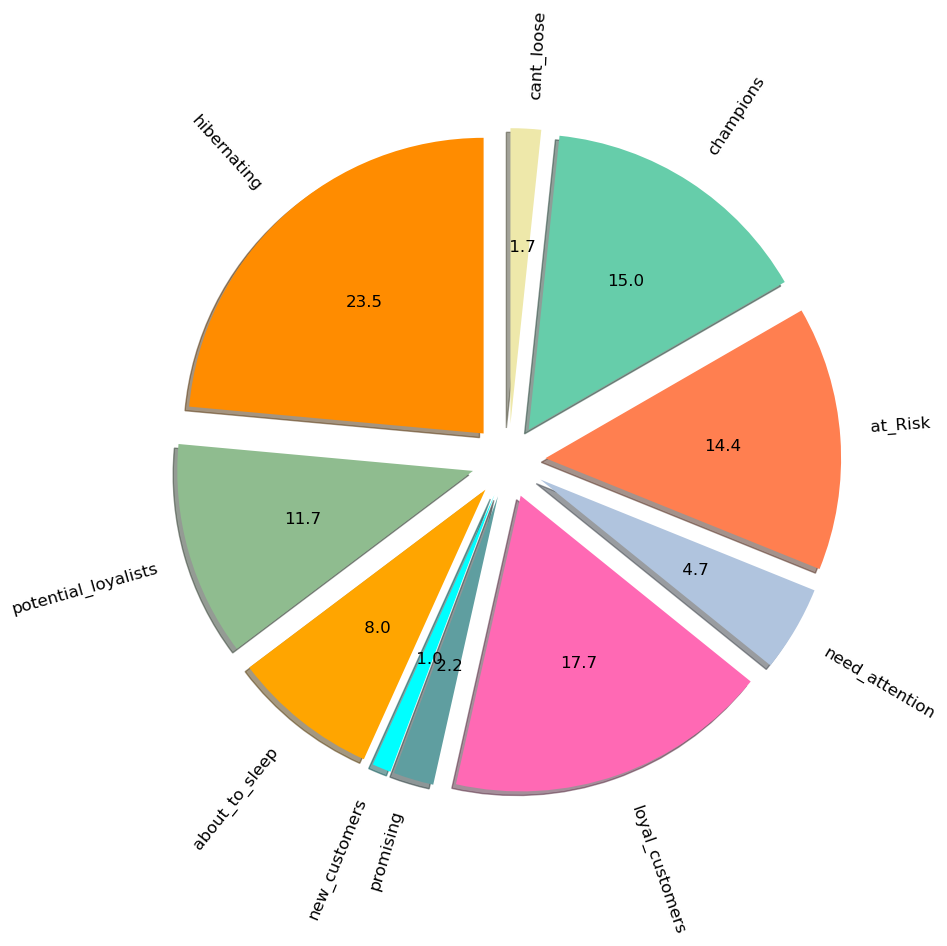

In [38]:
colors  = ("darkorange", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine","palegoldenrod")
explodes = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

rfm_df["Segment"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True, 
                                                 explode = explodes)
plt.ylabel("");

In [39]:
rfm_df[["recency", "frequency", "monetary"]].agg(["mean"])

,recency,frequency,monetary
mean,92.83623,4.401714,818.293036


In [40]:
rfm_df[["Segment","recency", "frequency", "monetary"]].groupby("Segment").agg(["mean", "count","sum"])

recency                frequency              \
                           mean count     sum       mean count   sum   
Segment                                                                
about_to_sleep        54.791411   326   17862   1.150307   326   375   
at_Risk              153.947458   590   90829   2.894915   590  1708   
cant_loose           131.235294    68    8924   8.235294    68   560   
champions              8.179445   613    5014  13.329527   613  8171   
hibernating          215.074844   962  206902   1.111227   962  1069   
loyal_customers       37.475795   723   27095   6.355463   723  4595   
need_attention        53.661458   192   10303   2.322917   192   446   
new_customers          9.904762    42     416   1.000000    42    42   
potential_loyalists   19.801670   479    9485   1.931106   479   925   
promising             26.733333    90    2406   1.000000    90    90   

                        monetary                     
                            mean count          sum  
Segment                                              
about_to_sleep        216.235460   326    70492.760  
at_Risk               467.563290   590   275862.341  
cant_loose           1262.598088    68    85856.670  
champions            2661.273741   613  1631360.803  
hibernating           176.059360   962   169369.104  
loyal_customers      1148.678321   723   830494.426  
need_attention        439.855000   192    84452.160  
new_customers         183.002857    42     7686.120  
potential_loyalists   351.635386   479   168433.350  
promising             207.992444    90    18719.320

### K-means Algoritmasını Kullanarak Müşteri Segmentasyonu

In [41]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
13,489436,21755,LOVE BUILDING BLOCK WORD,18,2009-12-01 09:06:00,5.45,13078.0,United Kingdom,98.10
14,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,17.85
15,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom,27.04


In [42]:
# RFM (Recency, Frequency, Monetary) analizini yaparak segmentasyon için veri hazırlama
current_date = df['InvoiceDate'].max()
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'Invoice': 'count',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [44]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [45]:
# En uygun küme sayısını belirlemek için Elbow yöntemi
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

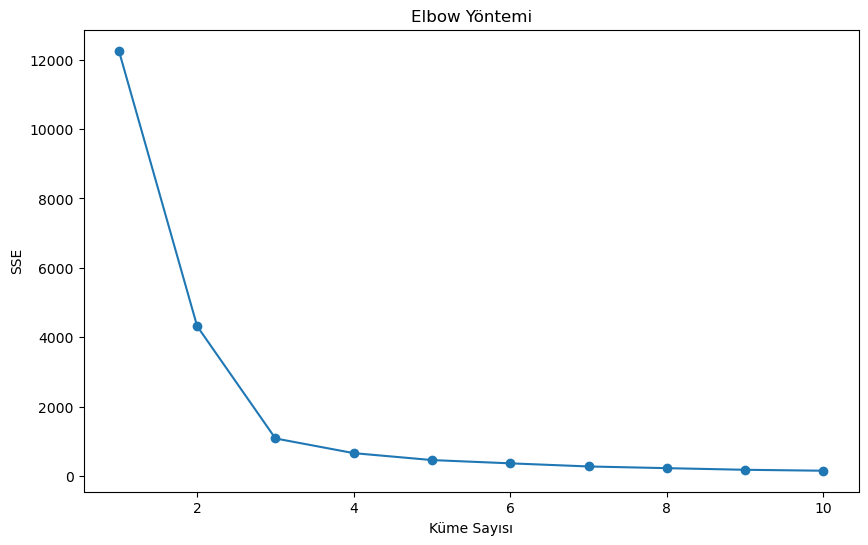

In [46]:
# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('SSE')
plt.title('Elbow Yöntemi')
plt.show()

In [47]:
# En uygun küme sayısı 4 olarak seçiliyor (örneğin)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [48]:
# Her segmentin ortalama RFM değerlerini hesaplama
rfm_clustered = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

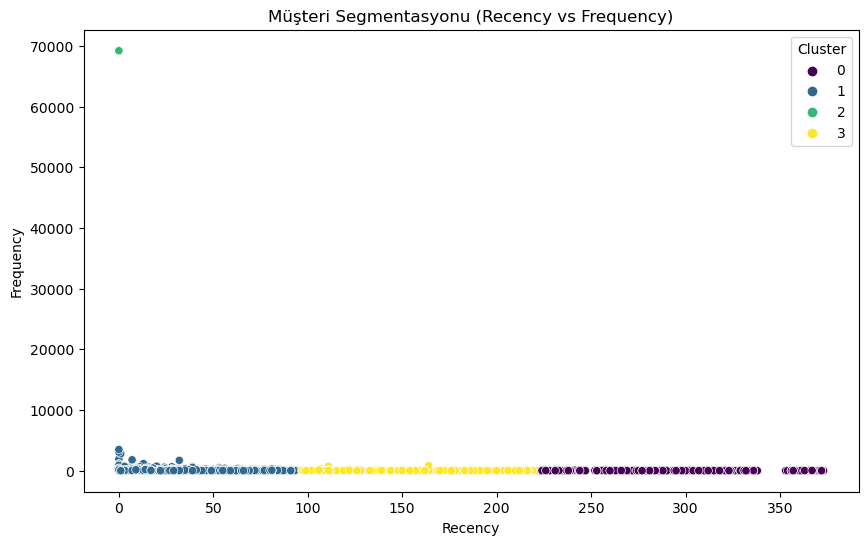

In [49]:
# Segmentasyon sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('Müşteri Segmentasyonu (Recency vs Frequency)')
plt.show()

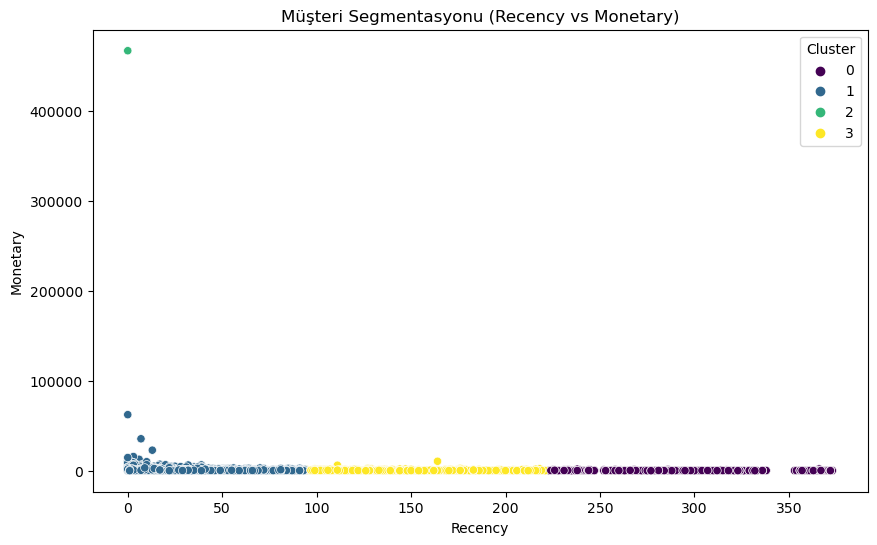

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Müşteri Segmentasyonu (Recency vs Monetary)')
plt.show()

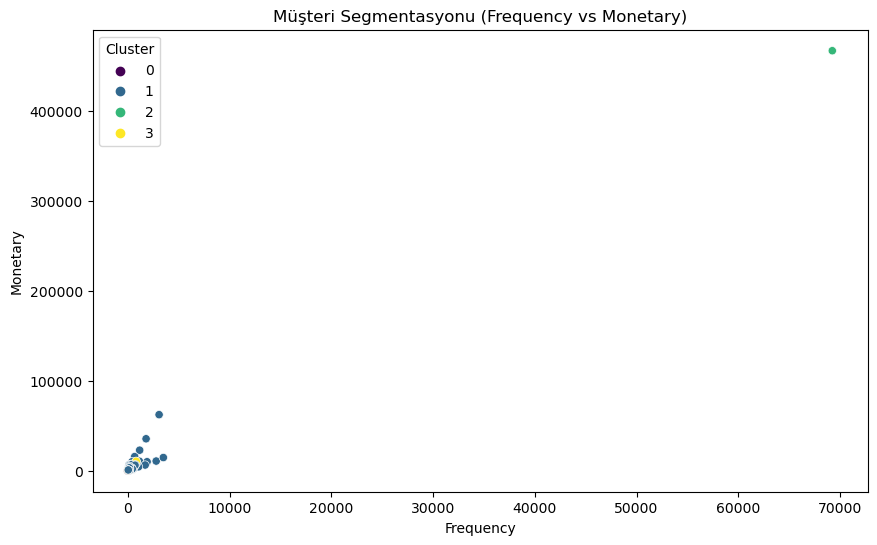

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Müşteri Segmentasyonu (Frequency vs Monetary)')
plt.show()


In [52]:
# Her segmentin özelliklerini inceleme
print(rfm_clustered)

   Cluster     Recency     Frequency       Monetary
0        0  289.365591     17.863799     206.767462
1        1   33.327798     77.494585     898.222354
2        2    0.000000  69228.000000  466710.720000
3        3  155.134921     30.234127     360.534616


In [53]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
13,489436,21755,LOVE BUILDING BLOCK WORD,18,2009-12-01 09:06:00,5.45,13078.0,United Kingdom,98.10
14,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,17.85
15,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom,27.04
